In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os

import healpy as hp

from tqdm import tqdm

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

In [3]:
import sys
sys.path.append('../')
import dirs

In [4]:
try:
    long_PL, lat_PL = np.loadtxt(dirs.data_dir + 'Interaction_params_PL.txt', unpack=True, usecols=(1,2))
except FileNotFoundError as err:
    long_PL, lat_PL = np.loadtxt(dirs.data_dir + 'Interaction_params_PL_short.txt', unpack=True, usecols=(1,2))
    
try:
    long_NFW, lat_NFW = np.loadtxt(dirs.data_dir + 'Interaction_params_NFW.txt', unpack=True, usecols=(1,2))
except FileNotFoundError as err:
    long_NFW, lat_NFW = np.loadtxt(dirs.data_dir + 'Interaction_params_NFW_short.txt', unpack=True, usecols=(1,2))

In [9]:
np.sqrt(0.68)

0.8246211251235321

In [5]:
long_PL_68 = np.quantile(np.abs(long_PL), np.sqrt(0.68))
lat_PL_68 = np.quantile(np.abs(lat_PL), np.sqrt(0.68))

long_NFW_68 = np.quantile(np.abs(long_NFW), np.sqrt(0.68))
lat_NFW_68 = np.quantile(np.abs(lat_NFW), np.sqrt(0.68))

In [6]:
print(np.sum((np.abs(long_NFW) < long_NFW_68) & (np.abs(lat_NFW) < lat_NFW_68))/len(long_NFW))
print(np.sum((np.abs(long_PL) < long_PL_68) & (np.abs(lat_PL) < lat_PL_68))/len(long_PL))

0.707335
0.71558


(array([3.90000e+01, 4.00000e+01, 3.50000e+01, 4.40000e+01, 3.70000e+01,
        4.60000e+01, 4.60000e+01, 4.20000e+01, 4.40000e+01, 5.20000e+01,
        5.60000e+01, 7.70000e+01, 4.60000e+01, 6.20000e+01, 8.50000e+01,
        7.40000e+01, 8.40000e+01, 1.18000e+02, 1.13000e+02, 1.43000e+02,
        1.52000e+02, 1.71000e+02, 1.85000e+02, 2.03000e+02, 2.32000e+02,
        2.69000e+02, 2.85000e+02, 3.07000e+02, 3.87000e+02, 4.26000e+02,
        4.18000e+02, 5.14000e+02, 5.94000e+02, 6.45000e+02, 7.51000e+02,
        8.63000e+02, 9.60000e+02, 1.05800e+03, 1.31800e+03, 1.67800e+03,
        2.21800e+03, 3.07600e+03, 4.54800e+03, 6.98700e+03, 1.12470e+04,
        1.88920e+04, 3.19570e+04, 5.64990e+04, 1.07399e+05, 2.34006e+05,
        2.44034e+05, 1.12869e+05, 5.87770e+04, 3.29810e+04, 1.94720e+04,
        1.15350e+04, 7.43900e+03, 4.80200e+03, 3.24800e+03, 2.27300e+03,
        1.78000e+03, 1.38100e+03, 1.16500e+03, 9.91000e+02, 7.98000e+02,
        6.70000e+02, 6.55000e+02, 6.09000e+02, 5.40

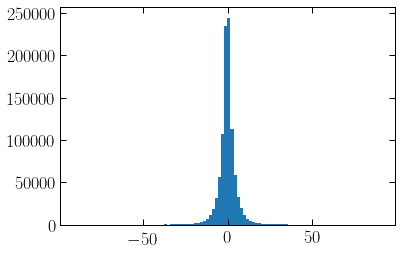

In [7]:
plt.figure()

plt.hist(long_PL, bins=100)

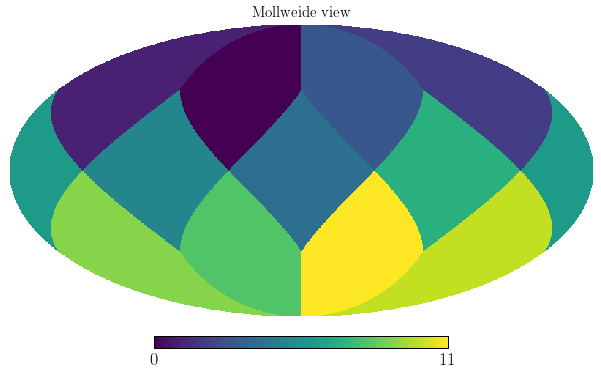

In [8]:
hp.mollview(np.arange(12))

In [9]:
N_side = 50

In [10]:
pix_PL = hp.pixelfunc.ang2pix(N_side, long_PL, lat_PL, nest=False, lonlat=True)
pix_NFW = hp.pixelfunc.ang2pix(N_side, long_NFW, lat_NFW, nest=False, lonlat=True)

In [11]:
npix = hp.pixelfunc.nside2npix(N_side)

In [14]:
counts_PL = np.zeros(npix)
counts_NFW = np.zeros(npix)
for i in tqdm(range(npix)):
    counts_PL[i] = np.count_nonzero(pix_PL == i)
    counts_NFW[i] = np.count_nonzero(pix_NFW == i)
    
counts_PL /= np.sum(counts_PL)
counts_NFW /= np.sum(counts_NFW)

100%|██████████| 30000/30000 [01:01<00:00, 490.98it/s]


<Figure size 432x288 with 0 Axes>

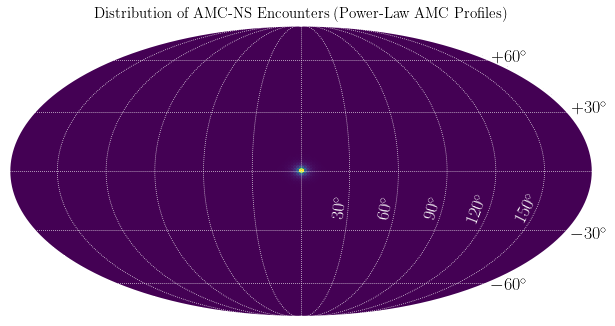

In [91]:
plt.figure()
#hp.mollview(np.log10((counts_PL + 1)/np.sum(counts_PL)), cbar=False)
hp.mollview((counts_PL + 1e-6)/np.sum(counts_PL), cbar=False)
#hp.graticule(30,color='white')

b_list = np.linspace(-90, 90,1000)



#68% values
Lon_max = long_PL_68
Lat_max = lat_PL_68

#hp.projplot(Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(-Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),-Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(lon_list_PL,lat_list_PL, lonlat=True,color='w', linestyle='-.',lw=2)

for lat in np.arange(-180, 180, 30):
    hp.projplot(0.0*b_list + lat,b_list, lonlat=True,color='w', linestyle=':',lw=0.75)

    
hp.projplot(0.0*b_list + 180,b_list, lonlat=True, color='w',lw=3)
hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=3)




#hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=2)


plt.text(1.3, 0.75,r'$+60^\circ$')
plt.text(1.85, 0.4,r'$+30^\circ$')

plt.text(1.85, -0.45,r'$-30^\circ$')
plt.text(1.3, -0.8,r'$-60^\circ$')

#props = dict(facecolor='white', alpha=0.25, edgecolor='none', boxstyle="round,pad=0.25,rounding_size=0.5")
props=None

plt.text(0.2, -0.25, r'$30^\circ$', color='white', rotation=84, bbox=props, va='center')
plt.text(0.51, -0.25, r'$60^\circ$', color='white', rotation=79, bbox=props, va='center')
plt.text(0.83, -0.25, r'$90^\circ$', color='white', rotation=74, bbox=props, va='center')
plt.text(1.12, -0.25, r'$120^\circ$', color='white', rotation=69, bbox=props, va='center')
plt.text(1.45, -0.25, r'$150^\circ$', color='white', rotation=63, bbox=props, va='center')


l_list = np.linspace(-180, 180, 1000)

for lon in np.arange(-90, 90, 30):
    hp.projplot(l_list,0.0*l_list + lon, lonlat=True,color='w', linestyle=':', lw=0.75)
    
plt.title("Distribution of AMC-NS Encounters (Power-Law AMC Profiles)")

plt.savefig("../../plots/SkyMap_Moll_PL.pdf", bbox_inches="tight")
plt.show()

In [90]:
#Find threshold value:
#print(len(counts_NFW))
count_list = np.geomspace(1e-6, 1, 100)
for count in count_list:
    #print(np.sum(counts_NFW[counts_NFW > count]))
    if (np.sum(counts_NFW[counts_NFW > count]) < 0.68):
        contain68_NFW = count
        break
print(contain68_NFW)
print(np.sum(counts_NFW[counts_NFW > contain68_NFW]))

0.0003053855508833416
0.677319


In [139]:
#### Find curves to describe this region
#hp.ang2pix(N_side, lon, lat, lonlat=True)

lon_list = np.linspace(-180, 180, 180)
lat_list_bottom = 0.0*lon_list
lat_list_top = 0.0*lon_list
lat_range = np.linspace(0, 90, 180)
i0 = 0
for i, lon in enumerate(lon_list):
    #print(i)
    for lat in lat_range:
        ipix = hp.ang2pix(N_side, lon, lat, lonlat=True)
        if (counts_NFW[ipix] < contain68_NFW):
            lat_list_top[i] = lat
            if ((i0 == 0) and (lat != 0)):
                i0 = i
            #print(i0, i)
            break
            
for i, lon in enumerate(lon_list):
    #print(i)
    for lat in lat_range:
        ipix = hp.ang2pix(N_side, lon, -lat, lonlat=True)
        if (counts_NFW[ipix] < contain68_NFW):
            lat_list_bottom[i] = -lat
            #if ((i0 == 0) and (lat != 0)):
            #    i0 = i
            #print(i0, i)
            break

imax = np.where(lat_list_top > 0)[0][-1]
lon_list = lon_list[i0:imax]
lat_list_bottom = lat_list_bottom[i0:imax]
lat_list_top = lat_list_top[i0:imax]

#p = np.polyfit(lon_list, lat_list, 1)
#print(p)

lon_list_NFW = np.concatenate((lon_list, lon_list[::-1]))
lat_list_NFW = np.concatenate((lat_list_top, lat_list_bottom[::-1]))
#lat_line = np.polyval(p, lon_list)
#lat_list_NFW = np.concatenate((lat_line, -lat_line, -lat_line, lat_line))

<Figure size 432x288 with 0 Axes>

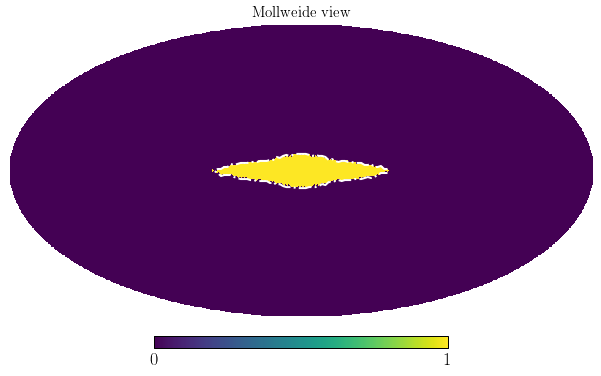

In [140]:
plt.figure()
hp.mollview(counts_NFW > contain68_NFW)
hp.projplot(lon_list_NFW,lat_list_NFW, lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(lon_list,lat_list_bottom, lonlat=True,color='w', linestyle='-.',lw=2)


<Figure size 432x360 with 0 Axes>

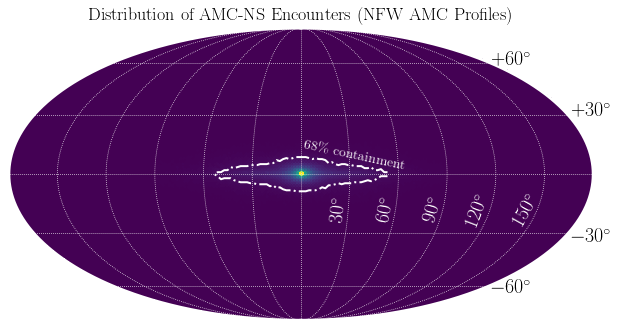

In [147]:
plt.figure(figsize=(6,5))
#hp.mollview(np.log10((counts_NFW+1)/np.sum(counts_NFW)), cbar=False)
hp.mollview((counts_NFW+1e-6)/np.sum(counts_NFW), cbar=False)#, cbar=True)
#hp.graticule(30,color='white')

b_list = np.linspace(-90, 90,1000)

#90% values
#Lon_max = 74
#Lat_max = 40

#68% values
#Lon_max = long_NFW_68
#Lat_max = lat_NFW_68


#hp.projplot(Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(-Lon_max + np.zeros(100),np.linspace(-Lat_max, Lat_max, 100), lonlat=True,color='w', linestyle='-.',lw=2)

#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),-Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)
#hp.projplot(np.linspace(-Lon_max, Lon_max, 100),Lat_max + np.zeros(100), lonlat=True,color='w', linestyle='-.',lw=2)

hp.projplot(lon_list_NFW,lat_list_NFW, lonlat=True,color='w', linestyle='-.',lw=2)

for lat in np.arange(-180, 180, 30):
    hp.projplot(0.0*b_list + lat,b_list, lonlat=True,color='w', linestyle=':',lw=0.75)

hp.projplot(0.0*b_list + 180,b_list, lonlat=True, color='w',lw=3)
hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=3)

#hp.projplot(0.0*b_list + 179.9,b_list, lonlat=True, color='w',lw=2)

plt.text(1.3, 0.75,r'$+60^\circ$', fontsize=20)
plt.text(1.85, 0.4,r'$+30^\circ$', fontsize=20)

plt.text(1.85, -0.45,r'$-30^\circ$', fontsize=20)
plt.text(1.3, -0.8,r'$-60^\circ$', fontsize=20)

#props = dict(facecolor='white', alpha=0.25, edgecolor='none', boxstyle="round,pad=0.25,rounding_size=0.5")
props=None

plt.text(0.19, -0.25, r'$30^\circ$', color='white', rotation=84, bbox=props, va='center', fontsize=20)
plt.text(0.50, -0.25, r'$60^\circ$', color='white', rotation=79, bbox=props, va='center', fontsize=20)
plt.text(0.82, -0.25, r'$90^\circ$', color='white', rotation=74, bbox=props, va='center', fontsize=20)
plt.text(1.11, -0.25, r'$120^\circ$', color='white', rotation=69, bbox=props, va='center', fontsize=20)
plt.text(1.43, -0.25, r'$150^\circ$', color='white', rotation=61, bbox=props, va='center', fontsize=20)
#plt.text(-0.55, 0.20, r'$68\%$ containment', color='white', rotation=0, bbox=props, va='center', fontsize=16)

plt.text(0.01, 0.13, r'$68\%$ containment', color='white', rotation=-12, bbox=props, va='center', fontsize=14)

l_list = np.linspace(-180, 180, 1000)

for lon in np.arange(-90, 90, 30):
    hp.projplot(l_list,0.0*l_list + lon, lonlat=True,color='w', linestyle=':', lw=0.75)

plt.title("Distribution of AMC-NS Encounters (NFW AMC Profiles)", fontsize=18)


plt.savefig("../../plots/SkyMap_Moll_NFW.pdf", bbox_inches="tight")
plt.show()

In [94]:
longitude = np.linspace(-180, 180, N_side)
latitude = np.linspace(-90, 90, N_side)

ValueError: cannot reshape array of size 30000 into shape (50,50)

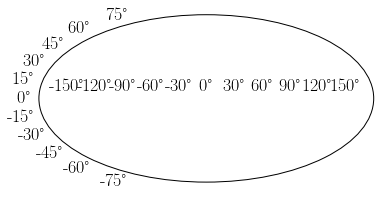

In [99]:
fig = plt.figure()
# matplotlib is doing the mollveide projection
ax = fig.add_subplot(111,projection='mollweide')

map_NFW = ((counts_NFW+1)/np.sum(counts_NFW)).reshape(N_side, N_side)

image = plt.pcolormesh(longitude[::-1], latitude, map_NFW)
